<a href="https://colab.research.google.com/github/lsouders/PythonProjectModule5/blob/main/BurkeSchuman1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

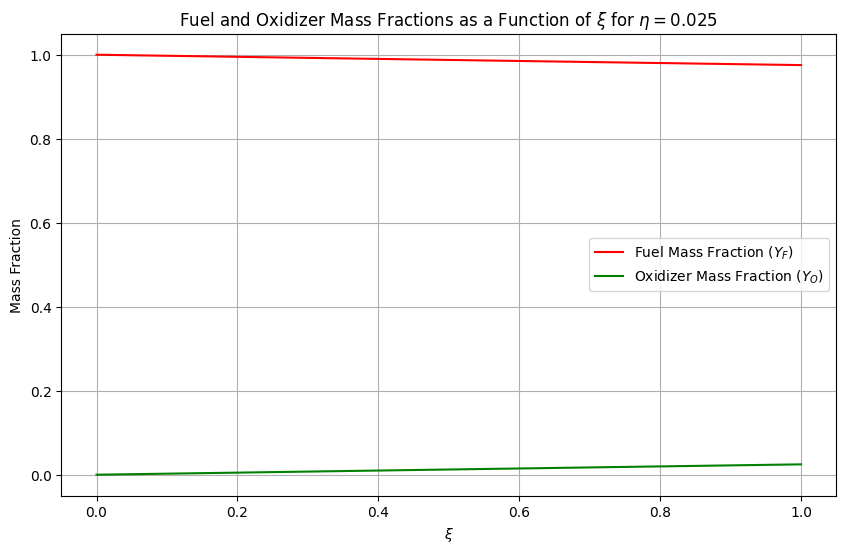

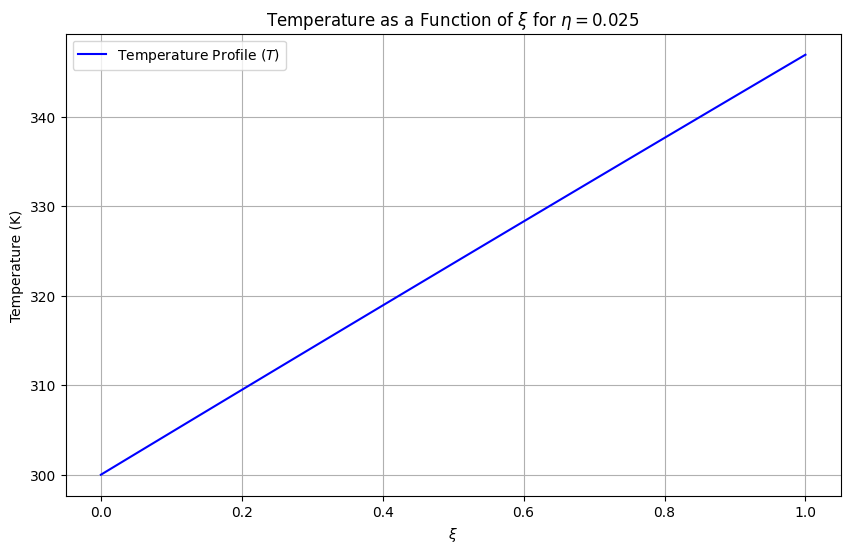

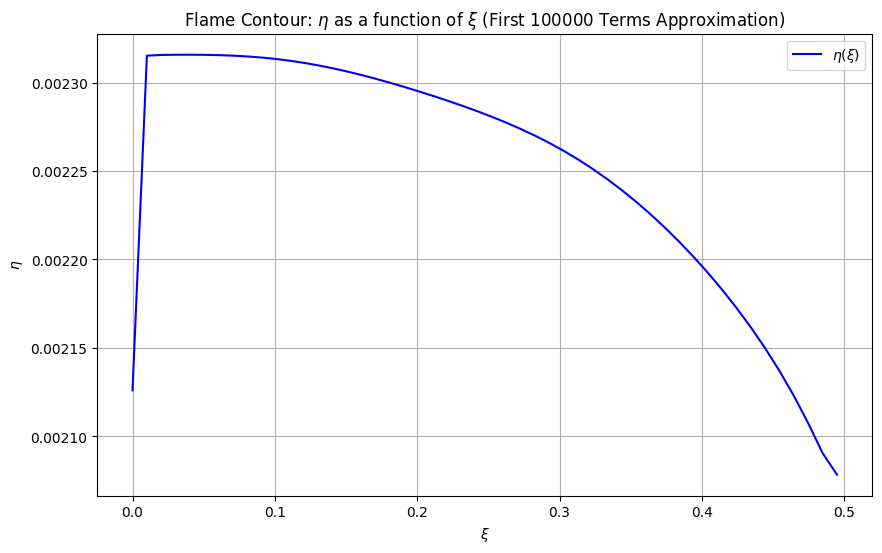

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0, j1

# Parameters
nu = .064  # given value for nu
C = 0.5  # given value for C
phi_values = [3.8317 + n * np.pi for n in range(100000)]  # first 100000 roots of J0 (approximated)
eta_const = 0.025  # given value for eta for part b and c

# Define eta as a function of xi
def eta(xi, C, nu, phi_values):
    sum_term = 0
    for phi in phi_values:
        sum_term += (1 / phi) * (j1(C * phi) / (j0(phi) ** 2)) * j0(phi * xi)
    numerator = nu - (1 + nu) * C**2
    if sum_term <= 0 or numerator <= 0:
        return np.nan  # Avoid invalid values for logarithm
    return -1 / (phi_values[0]**2) * np.log(numerator / (2 * (1 + nu) * C * sum_term))

# Numerical solution for eta as a function of xi
xi_values = np.linspace(0, 1, 100)  # range of xi values
eta_values = [eta(xi, C, nu, phi_values) for xi in xi_values]

# Part b: Plot fuel and oxidizer mass fractions as a function of xi
# Assuming simple exponential decay relations for fuel and oxidizer
Y_F = np.exp(-eta_const * xi_values)  # Fuel mass fraction profile
Y_O = 1 - Y_F  # Oxidizer mass fraction profile, assuming stoichiometric conditions

plt.figure(figsize=(10, 6))
plt.plot(xi_values, Y_F, label='Fuel Mass Fraction ($Y_F$)', color='r')
plt.plot(xi_values, Y_O, label='Oxidizer Mass Fraction ($Y_O$)', color='g')
plt.xlabel(r'$\xi$')
plt.ylabel('Mass Fraction')
plt.title(r'Fuel and Oxidizer Mass Fractions as a Function of $\xi$ for $\eta = 0.025$')
plt.grid()
plt.legend()
plt.show()

# Part c: Plot temperature as a function of xi
# Assuming linear relation between temperature and mass fraction for simplicity
T_unburnt = 300  # Unburnt temperature in K
T_adiabatic = 2200  # Adiabatic flame temperature in K
Temperature = T_unburnt + (T_adiabatic - T_unburnt) * (1 - Y_F)  # Temperature profile

plt.figure(figsize=(10, 6))
plt.plot(xi_values, Temperature, label='Temperature Profile ($T$)', color='b')
plt.xlabel(r'$\xi$')
plt.ylabel('Temperature (K)')
plt.title(r'Temperature as a Function of $\xi$ for $\eta = 0.025$')
plt.grid()
plt.legend()
plt.show()

# Plot eta as a function of xi
plt.figure(figsize=(10, 6))
plt.plot(xi_values, eta_values, label=r'$\eta(\xi)$', color='b')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\eta$')
plt.title(r'Flame Contour: $\eta$ as a function of $\xi$ (First 100000 Terms Approximation)')
plt.grid()
plt.legend()
plt.show()



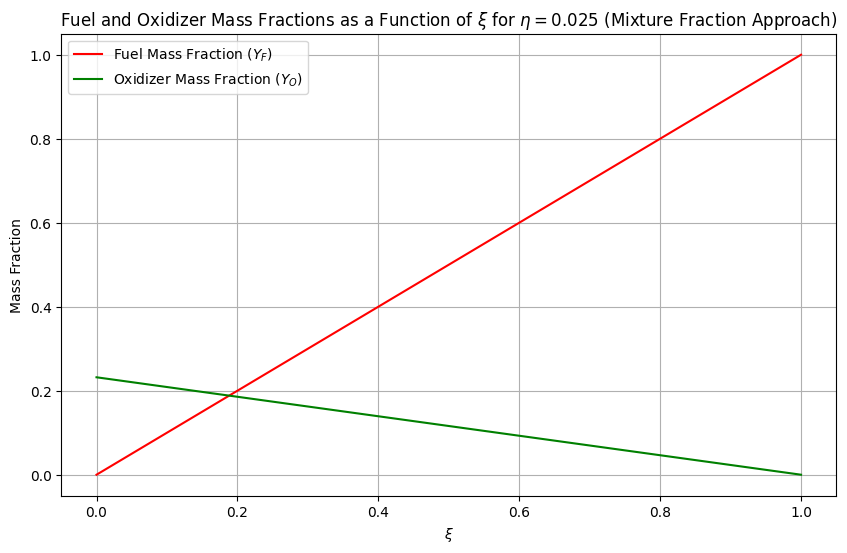

<ipython-input-23-f66b615a2b2e>:30: RuntimeWarning: divide by zero encountered in divide
  phi_local = (Y_F / Y_O) / stoichiometric_ratio


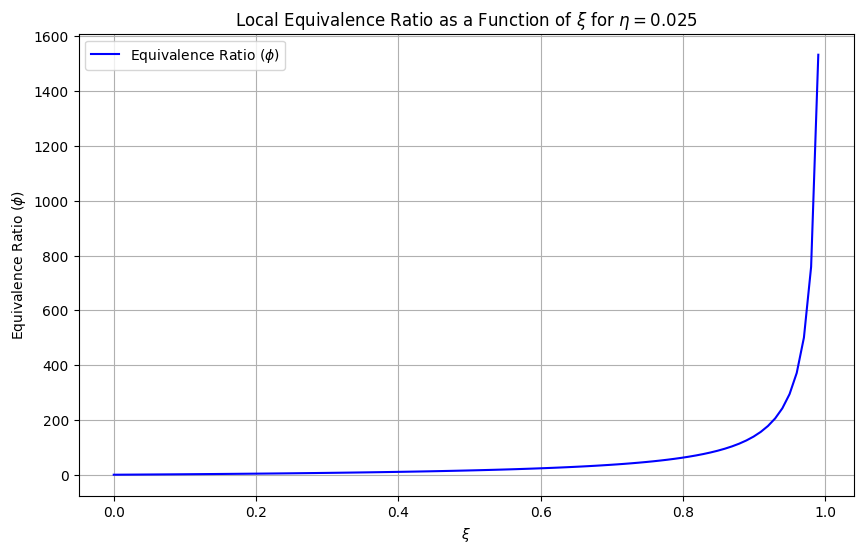

<ipython-input-23-f66b615a2b2e>:46: RuntimeWarning: invalid value encountered in divide
  Temperature = T_unburnt + (T_adiabatic - T_unburnt) * (phi_local / (1 + phi_local))  # Temperature profile assuming equilibrium


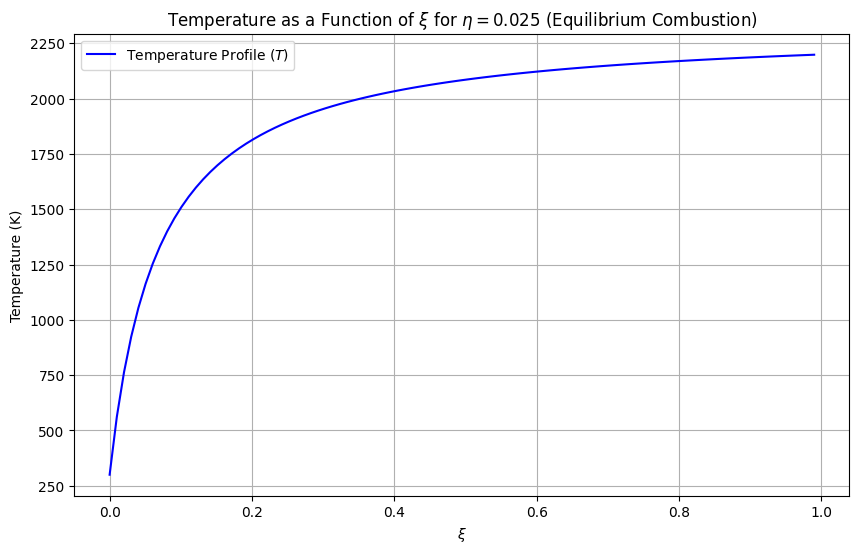

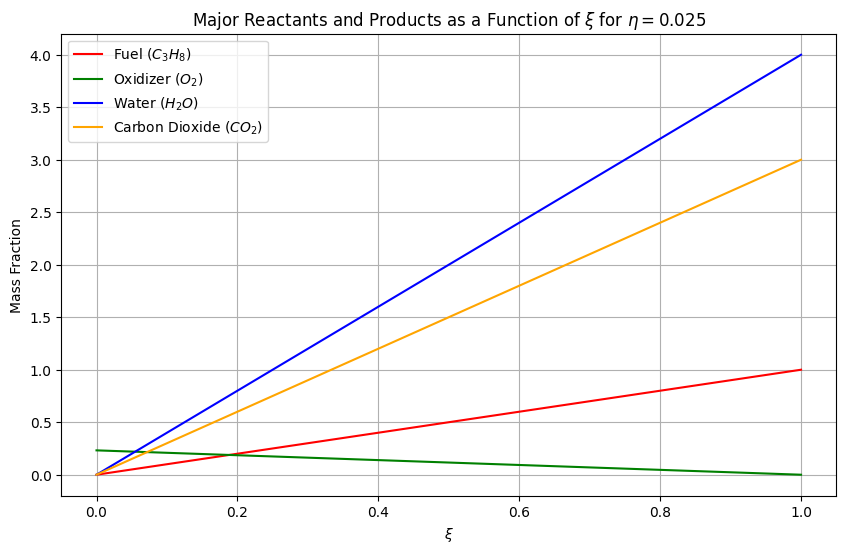

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_const = 0.025  # given value for eta

# Part b: Mixture fraction approach
# Assuming mixture fraction Z varies linearly from 0 (pure oxidizer) to 1 (pure fuel)
xi_values = np.linspace(0, 1, 100)  # range of xi values
Z = xi_values  # Mixture fraction profile

# Fuel and oxidizer mass fractions as a function of mixture fraction
Y_F = Z  # Fuel mass fraction (linear with mixture fraction)
Y_O = (1 - Z) * 0.232  # Oxidizer mass fraction, scaled by oxygen content in air (21% by volume, ~23.2% by mass)

# Plot fuel and oxidizer mass fractions
plt.figure(figsize=(10, 6))
plt.plot(xi_values, Y_F, label='Fuel Mass Fraction ($Y_F$)', color='r')
plt.plot(xi_values, Y_O, label='Oxidizer Mass Fraction ($Y_O$)', color='g')
plt.xlabel(r'$\xi$')
plt.ylabel('Mass Fraction')
plt.title(r'Fuel and Oxidizer Mass Fractions as a Function of $\xi$ for $\eta = 0.025$ (Mixture Fraction Approach)')
plt.grid()
plt.legend()
plt.show()

# Part c: Local equivalence ratio as a function of xi
# Equivalence ratio phi = (Fuel/Oxidizer) / (Stoichiometric Fuel/Oxidizer)
stoichiometric_ratio = 0.2756  # From previous calculation
phi_local = (Y_F / Y_O) / stoichiometric_ratio

# Plot equivalence ratio
plt.figure(figsize=(10, 6))
plt.plot(xi_values, phi_local, label='Equivalence Ratio ($\phi$)', color='b')
plt.xlabel(r'$\xi$')
plt.ylabel('Equivalence Ratio ($\phi$)')
plt.title(r'Local Equivalence Ratio as a Function of $\xi$ for $\eta = 0.025$')
plt.grid()
plt.legend()
plt.show()

# Temperature as a function of xi
# Assuming combustion occurs at each local equivalence ratio
T_unburnt = 300  # Unburnt temperature in K
T_adiabatic = 2200  # Adiabatic flame temperature in K
Temperature = T_unburnt + (T_adiabatic - T_unburnt) * (phi_local / (1 + phi_local))  # Temperature profile assuming equilibrium

plt.figure(figsize=(10, 6))
plt.plot(xi_values, Temperature, label='Temperature Profile ($T$)', color='b')
plt.xlabel(r'$\xi$')
plt.ylabel('Temperature (K)')
plt.title(r'Temperature as a Function of $\xi$ for $\eta = 0.025$ (Equilibrium Combustion)')
plt.grid()
plt.legend()
plt.show()

# Major reactant and product profiles
# Assuming complete combustion, calculate major species
Y_H2O = 4 * Y_F  # Water production proportional to fuel consumption
Y_CO2 = 3 * Y_F  # CO2 production proportional to fuel consumption

# Plot major reactants and products
plt.figure(figsize=(10, 6))
plt.plot(xi_values, Y_F, label='Fuel ($C_3H_8$)', color='r')
plt.plot(xi_values, Y_O, label='Oxidizer ($O_2$)', color='g')
plt.plot(xi_values, Y_H2O, label='Water ($H_2O$)', color='b')
plt.plot(xi_values, Y_CO2, label='Carbon Dioxide ($CO_2$)', color='orange')
plt.xlabel(r'$\xi$')
plt.ylabel('Mass Fraction')
plt.title(r'Major Reactants and Products as a Function of $\xi$ for $\eta = 0.025$')
plt.grid()
plt.legend()
plt.show()
